# Regression

This notebook introduces regression. We will learn about:

- What is Regression Modeling?
- Simple Regression
- MultipleLinearRegression

## What is Regression Modeling?



Suppose we are hired to investigate the link between advertising and sales ($y$) for a product. Our client can’t directly increase sales but can adjust advertising budgets. If we find an association, we can suggest budget changes to boost sales. What information would be useful in order to provide such a recommendation? Let's delve in to it:


Typically, we describe, if there is any, the association as a function between the two where advertising budgets are input variables ($X_1$ for TV, $X_2$ for radio, $X_3$ for newspaper, ...), while sales is the output variable ($y$). Generally, if we observe a quantitative response $Y$ and $p$ predictors ($X_1, X_2, ..., X_p$), we assume a _true relationship_ between $y$ and $X = (X_1, X_2, ..., X_p)$:

$$y = f(X) + \epsilon,$$

where $\epsilon$ represents the error. This relationship is called __the model__. It is common to say that we are regressing $y$ on $X$.


Input variables are also known as __predictors__, __independent variables__, or __features__, and the output variable as __the response__ or __dependent variable__.

Here are come important questions to address:

- Is there a relationship between advertising budget and sales?

- If so, how strong is the relationship between advertising budget and sales?

- Which media are more important?

## Simple Linear Regression (SLR):


SLR is a regresson task that assumes the true relationship between the $X$, $y$ is linear:

$$
Y = \beta_0 + \beta_1X + \varepsilon  \quad (*)
$$

Where:  $\varepsilon$ represents the error term or residuals, which accounts for the difference between the observed and predicted values of $Y$.

For example, in the following plot, we have some points $(x_i, y_i)$ and you can see a strong linear pattern in the data.

In [1]:
## Needed Libraries

## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background (for readability of visualizations)
sns.set_style("whitegrid")

In [7]:
# This generates data that look line a line
x = np.linspace(-5, 5, 75) ## Domain of the line
y = 2 * x + 3 + 2 * np.random.randn(75)  ## Linear relationship with added random noise

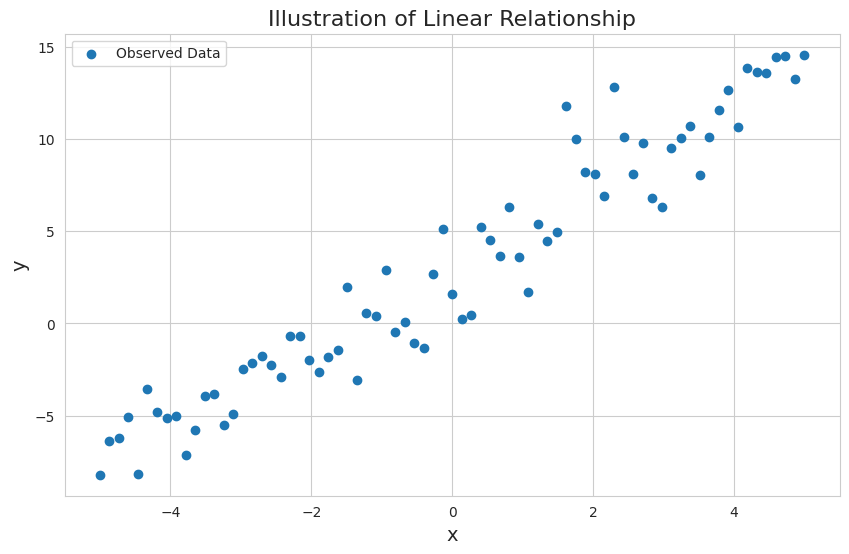

In [8]:
# Plotting the dataset

# This creates a figure with a size of 10 units by 6 units
plt.figure(figsize=(10, 6))

# Plots the observed data using plt.scatter
plt.scatter(x, y, label="A simulated data set")

# Adds labels to the x and y axes for better readability
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)

# Adds a title to the plot
plt.title("Illustration of Linear Relationship", fontsize=16)

# Creates a legend based on the labels provided
plt.legend()

plt.show()


Look like a line so this linear relationship can be modeled as a general $Y = \beta_0 + \beta_1X$. But for which $\beta_0$ and $\beta_1X$ we get a line that describes the dataset better? Let's see an example.

__Group Activity:__ Discuss which one of the following lines describe the dataset better.

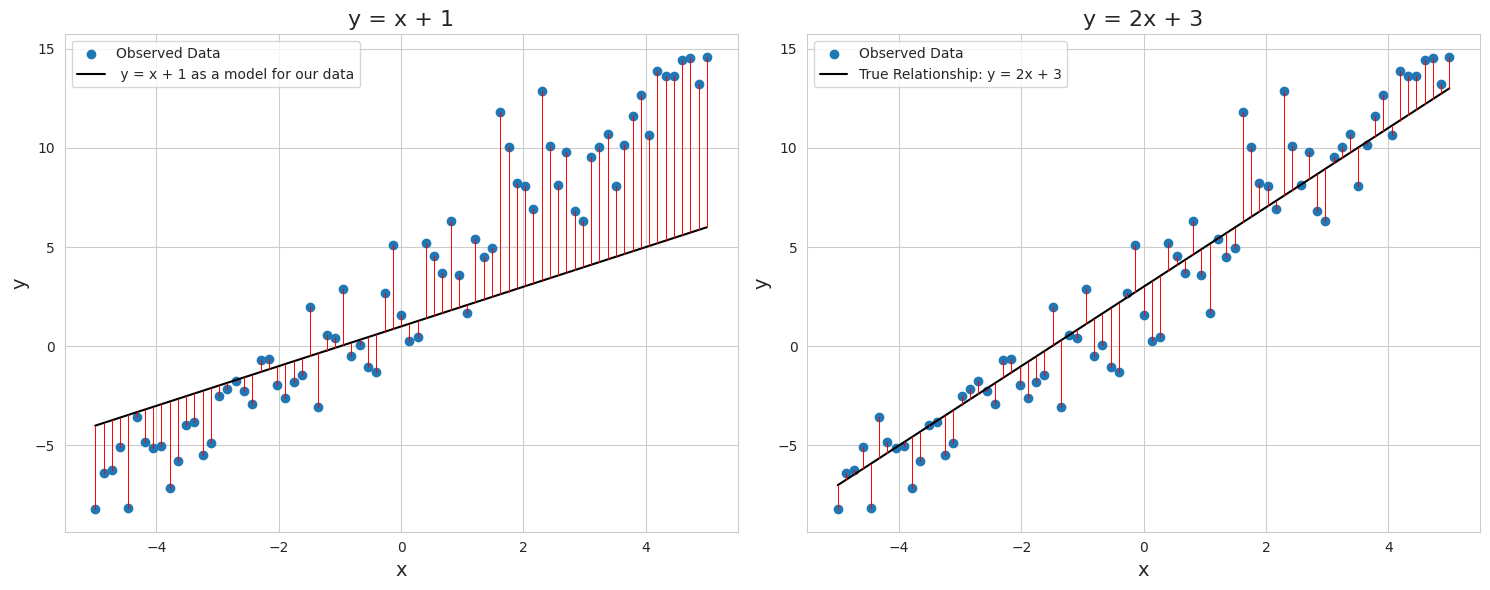

In [9]:
# Plotting
plt.figure(figsize=(15, 6))

# First subplot: Line: y = x + 1
plt.subplot(1, 2, 1)
plt.scatter(x, y, label="A simulated data set")
plt.plot(x, x + 1, color='black', linestyle='-', label=" y = x + 1 as a model for our data")
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], x[i] + 1], color='red', linestyle='-', linewidth=0.7)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("y = x + 1", fontsize=16)
plt.legend()
plt.grid(True)

# Second subplot: True Relationship: y = 2x + 3
plt.subplot(1, 2, 2)
plt.scatter(x, y, label="A simulated data set")
plt.plot(x, 2*x + 3, color='black', linestyle='-', label="True Relationship: y = 2x + 3")
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], 2*x[i] + 3], color='red', linestyle='-', linewidth=0.7)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("y = 2x + 3", fontsize=16)
plt.legend()
plt.grid(True)



plt.tight_layout()
plt.show()



### How to choose the coefficients?

Intuitively, among all possible lines that can describe the data, we want to choose a line that is collectively closer to data points. In other words, we aim to choose $\hat{\beta_0}$ and $\hat{\beta_1}$ so that $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1} X_i$ collectively approximate $y_i$ as closely as possible. A common way to measure collective closeness is the <i> Root Mean Squared Error (RMSE)</i>, which is essentially the average of the
squared differences between observed data and the model (the average length of the red vertical lines):

$$
RMSE = \bigg( \frac{1}{n}\sum_{i=1}^n(y_i - (\hat{\beta_0} +\hat{\beta_1}x))^2\bigg)^{\frac{1}{2}}$$

So now we
We are looking for values $\beta_0$ and $\beta_1$ that minimizes RMSE. Equivalently,and for simplicity, we can consider minimizing $(RMSE)^2:$

$$
MSE = \frac{1}{n}\sum_{i=1}^n(\hat{y_i} - y_i)^2.
$$


By doing some calculus (e.g., taking the derivative of MSE with respect to $\hat{\beta_0}$ and $\hat{\beta_1}$ and set them equal to zero) we have:


$$
\hat{\beta_1} = \frac{\sum_{i=1}^n\left(X_i - \overline{X}\right)\left(y_i - \overline{y}\right)}{\sum_{i=1}^n\left(X_i - \overline{X}\right)^2} = \frac{\text{cov}(X,y)}{\sigma^2_{X}},
$$

and

$$
\hat{\beta_0} = \overline{y} - \hat{\beta_1}\overline{X}.
$$

Then we can use $y = \hat{\beta_0} + \hat{\beta_1} X$ to predict the future value of $y$.


__Group Activity 1__

Write a function that takes in a data set of the form $\{(X_i, y_i): i = 1, \dots, p\}$, and returns $\hat{\beta}_0$ and $\hat{\beta}_1$. Then compute these values for our generated data above, and plot the regression line: $y = \hat{\beta_0} + \hat{\beta_1} X$.

In [ ]:
## Code Here

## Some considerations when we use linear regression?


### How can we be sure if the true relation is really linear??

If plotting your data as (we did above) is not enough, you can also use __the Pearson Correlation__, $\rho$. $\rho$ is a statistical measure of the _strength of the linear relationship_ between $y$ and $X$. Here's the formula:
$$
\rho = \frac{Cov(y,X)}{\sigma_X \sigma_y}
$$

The Pearson Correlation is bounded between $-1$ and $1$


1. A Pearson correlation coefficient close to -1 indicates a strong negative linear relationship.
2. A Pearson correlation coefficient close to 0 indicates no linear relationship.
3. A Pearson correlation coefficient close to 1 indicates a strong positive linear relationship.



We can approximate $\rho$ with the sample covariance and sample standard deviations, the approximation is $r$.

__Group Activity 2__

Write a function that takes in a data set of the form $\{(X_i, y): i = 1, \dots, p\}$, and returns the Pearson Correlation value. then apply that to our genereated data above and decide if there is a true linear relationship.

### Are all observations independent?

To check this, first think about how data is collected and find variables of concerns. Alternatievely, you can plot your residuals and check if there are normally distributed. In other words, if there is no obvious relationship in the plot.



__Group Activity 3__

Plot the residuals of our generated data above and check for obvious relation. Alternatively, make a histogram of the residuals to check for a bell curve.

### Model Performance

We measure the performance by looking at its predictions. The basic idea is to split the dataset into train and test subsets. Then we compute the regression line on train dataset and use it to predeict the values on the test dataset. A large gap between the training and testing MSE indicates high variance (overfitting), while a small gap may suggest high bias (underfitting). In our first lab (next session) we discuss this further.  

__Group Activity 4__

We can use this line for prediction. Discuss how can we measure the model performance in predicting future values? For example, if $X$ is our advertising budgets for TV, and $y$ is sales,

- describe the relation between X and y.
- how to use the regression line to predict the sales?
- is this prediction trustful?